In [11]:
import pandas as pd
import matplotlib 




df =pd.read_csv("C:/Users/sarth/tfl-northern/raw_data/lost-customer-hours.csv")

print(df.head())



  Financial Year  Period Bakerloo  Central      C&H District  Jubilee  \
0        2016-17     1.0  112,578  477,818  192,065  214,682  247,373   
1        2016-17     2.0   76,720  458,195  154,797  169,790  199,036   
2        2016-17     3.0  112,550  496,322  229,491  291,150  228,329   
3        2016-17     4.0  101,499  798,680  268,184  170,682  235,013   
4        2016-17     5.0   96,403  477,322  223,574  165,369  225,339   

  Metropolitan Northern Piccadilly Victoria Waterloo & City    Network  
0       89,559  207,184    125,575  159,153          18,615  1,844,602  
1       96,922  216,041    121,990  152,276           2,559  1,648,326  
2      187,294  196,815    161,332  190,018          13,361  2,106,662  
3      182,506  176,183    162,980  393,877           4,043  2,493,647  
4      147,445  273,465    200,244  205,436           7,379  2,021,978  


In [13]:
import pandas as pd
import matplotlib 




df =pd.read_csv("C:/Users/sarth/tfl-northern/raw_data/lost-customer-hours.csv")

print(df.info())
print(df.columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Financial Year   51 non-null     object 
 1   Period           51 non-null     float64
 2   Bakerloo         51 non-null     object 
 3   Central          51 non-null     object 
 4   C&H              51 non-null     object 
 5   District         51 non-null     object 
 6   Jubilee          51 non-null     object 
 7   Metropolitan     51 non-null     object 
 8   Northern         51 non-null     object 
 9   Piccadilly       51 non-null     object 
 10  Victoria         51 non-null     object 
 11  Waterloo & City  51 non-null     object 
 12  Network          51 non-null     object 
dtypes: float64(1), object(12)
memory usage: 5.4+ KB
None
Index(['Financial Year', 'Period', 'Bakerloo', 'Central', 'C&H', 'District',
       'Jubilee', 'Metropolitan', 'Northern', 'Piccadilly', 'Victoria',


In [5]:
import pandas as pd
import matplotlib 




df =pd.read_csv("C:/Users/sarth/tfl-northern/raw_data/lost-customer-hours.csv")
northern_df = df[["Financial Year", "Period", "Northern"]]
northern_df.head()
northern_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Financial Year  51 non-null     object 
 1   Period          51 non-null     float64
 2   Northern        51 non-null     object 
dtypes: float64(1), object(2)
memory usage: 1.3+ KB


In [13]:
import pandas as pd
import matplotlib 

df =pd.read_csv("C:/Users/sarth/tfl-northern/raw_data/lost-customer-hours.csv")
df["Northern"] = df["Northern"].str.replace(',', '').astype(float)
df["Northern"] = pd.to_numeric(df["Northern"])
northern_df = df[["Financial Year", "Period", "Northern"]]


northern_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Financial Year  51 non-null     object 
 1   Period          51 non-null     float64
 2   Northern        51 non-null     float64
dtypes: float64(2), object(1)
memory usage: 1.3+ KB


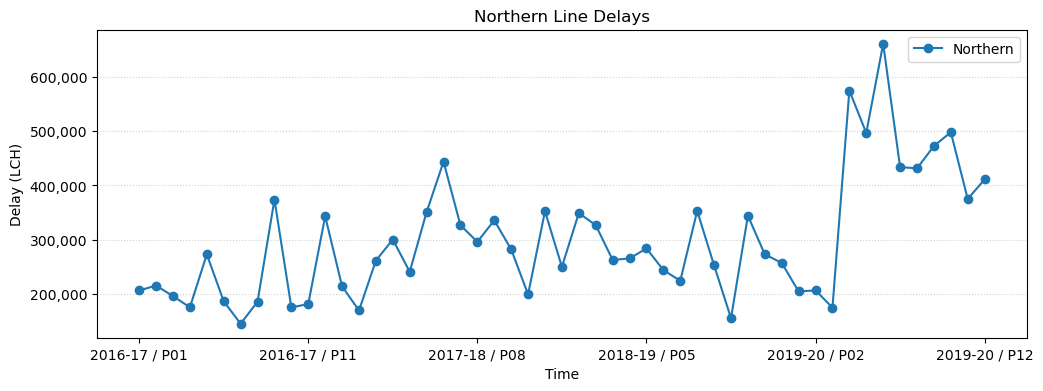

In [6]:
import pandas as pd
import matplotlib
from matplotlib.ticker import StrMethodFormatter

#obtain src data from directory
df =pd.read_csv("C:/Users/sarth/tfl-northern/raw_data/lost-customer-hours.csv")
#clean column of commas and convert to dtype float64
df["Northern"] = df["Northern"].str.replace(',', '').astype(float)
df["Northern"] = pd.to_numeric(df["Northern"])
#narrow data scope
northern_df = df[["Financial Year", "Period", "Northern"]]
#create axis labels for plot
df["Period_clean"] = pd.to_numeric(df["Period"], errors="coerce").astype("Int64")

df["fy_period"] = (
    df["Financial Year"].astype(str)
    + " / P"
    + df["Period_clean"].astype(str).str.zfill(2)
)
# sort by time
df_sorted = df.sort_values(by=["Financial Year", "Period"])
# plot trend over time
ax = df_sorted.plot.line(x="fy_period", y="Northern", marker="o", figsize=(12,4))
ax.set_title("Northern Line Delays")
ax.set_xlabel("Time")
ax.set_ylabel("Delay (LCH)")
ax.grid(axis="y", linestyle=":", alpha=0.6)
ax.yaxis.set_major_formatter(StrMethodFormatter("{x:,.0f}"))

#save command
fig = ax.get_figure()
fig.savefig("C:/Users/sarth/tfl-northern/outputs/figures/linechart.png", dpi=180, bbox_inches="tight")



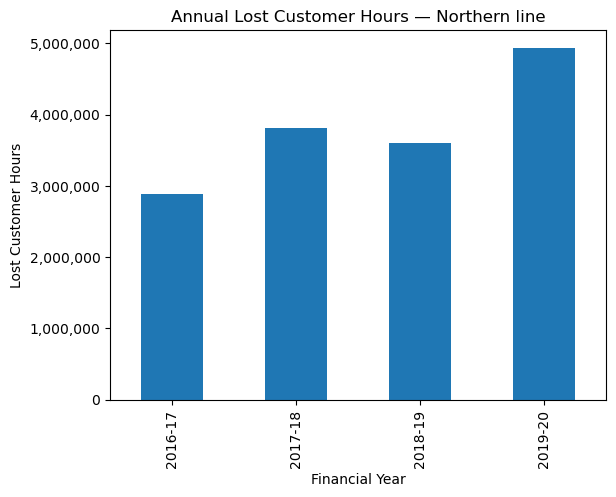

In [10]:
import pandas as pd
import matplotlib
from matplotlib.ticker import StrMethodFormatter

#obtain src data from directory
df =pd.read_csv("C:/Users/sarth/tfl-northern/raw_data/lost-customer-hours.csv")
#clean column of commas and convert to dtype float64
df["Northern"] = df["Northern"].str.replace(',', '').astype(float)
df["Northern"] = pd.to_numeric(df["Northern"])
#narrow data scope
northern_df = df[["Financial Year", "Period", "Northern"]]

#grouping
annual_totals = df.groupby("Financial Year")["Northern"].sum().reset_index()

#produce bar chart
ax = annual_totals.plot.bar(x="Financial Year", y="Northern", legend=False)

#formatting
ax.set_title("Annual Lost Customer Hours — Northern line")
ax.set_ylabel("Lost Customer Hours")
ax.set_xlabel("Financial Year")
ax.yaxis.set_major_formatter(StrMethodFormatter("{x:,.0f}"))

#save figure
fig = ax.get_figure()
fig.savefig("C:/Users/sarth/tfl-northern/outputs/figures/barchart.png", dpi=180, bbox_inches="tight")

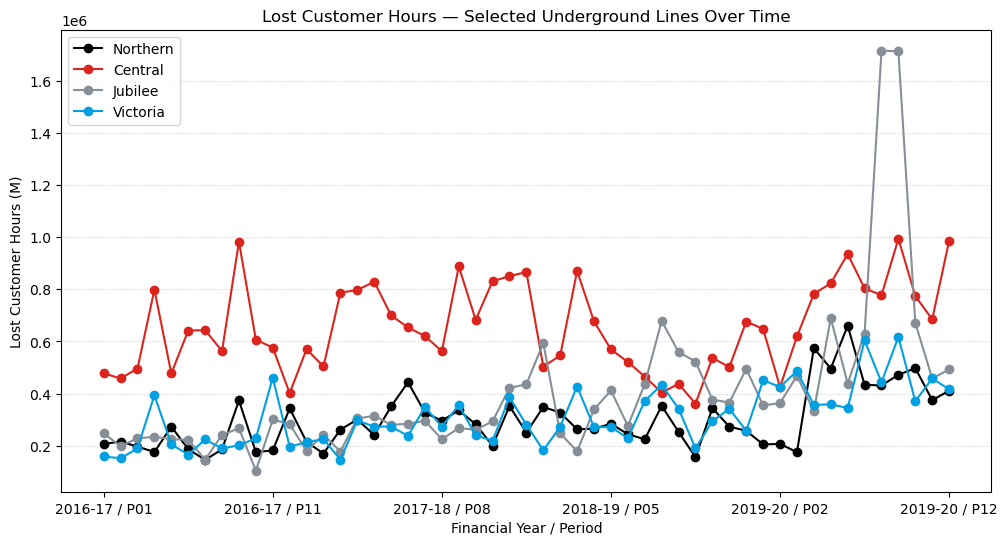

In [2]:
import pandas as pd
import matplotlib
from matplotlib.ticker import StrMethodFormatter
import numpy as np

#obtain src data from directory
df =pd.read_csv("C:/Users/sarth/tfl-northern/raw_data/lost-customer-hours.csv")

#selecting target columns
base_cols = ["Financial Year", "Period"]
line_cols = ["Northern", "Central", "Jubilee", "Victoria"]  # only series you will plot
cols = base_cols + line_cols
df_subset = df[cols].copy()


#cleaning numeric values (removing commas, cast to float)
for col in line_cols:
    df_subset[col] = (
        df_subset[col]
        .astype(str)
        .str.replace(",", "", regex=False)
        .replace(r"^\s*$", np.nan, regex=True)
        .apply(pd.to_numeric, errors="coerce")
    )


#df_subset["Period"] = pd.to_numeric(df_subset["Period"], errors="coerce").astype("Int64")



"""
df_subset["fy_period"] = (
    df_subset["Financial Year"].astype(str) + 
    " / P" + 
    df_subset["Period"].astype(int).astype(str)
)
"""
#axis build for plotting
df_subset["Period"] = pd.to_numeric(df_subset["Period"], errors="coerce").astype("Int64")
df_subset["fy_period"] = (
    df_subset["Financial Year"].astype(str) + " / P" + df_subset["Period"].astype(str).str.zfill(2)
)
df_sorted = df_subset.sort_values(by=["Financial Year", "Period"]).copy()



#plotting
tfl_colours = {
    "Northern": "#000000",  # black
    "Central": "#DC241F",   # red
    "Jubilee": "#868F98",   # silver/grey
    "Victoria": "#00A0E2",  # light blue
}

colors = [tfl_colours.get(c, "#999999") for c in line_cols]  # list aligns with y order

plot_df = df_sorted[["fy_period"] + line_cols]

ax = plot_df.plot(
    x="fy_period",
    y=line_cols,          
    figsize=(12, 6),
    color=colors,         
    marker="o"
)

ax.set_title("Lost Customer Hours — Selected Underground Lines Over Time")
ax.set_xlabel("Financial Year / Period")
ax.set_ylabel("Lost Customer Hours (M)")
ax.grid(axis="y", linestyle=":", alpha=0.6)

#save figure
fig = ax.get_figure()
fig.savefig("C:/Users/sarth/tfl-northern/outputs/figures/linechart2.png", dpi=180, bbox_inches="tight")

In [3]:
import pandas as pd

df =pd.read_csv("C:/Users/sarth/tfl-northern/raw_data/lost-customer-hours.csv")

print(list(df.columns))
print(df.info())

['Financial Year', 'Period', 'Bakerloo', 'Central', 'C&H', 'District', 'Jubilee', 'Metropolitan', 'Northern', 'Piccadilly', 'Victoria', 'Waterloo & City', 'Network']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Financial Year   51 non-null     object 
 1   Period           51 non-null     float64
 2   Bakerloo         51 non-null     object 
 3   Central          51 non-null     object 
 4   C&H              51 non-null     object 
 5   District         51 non-null     object 
 6   Jubilee          51 non-null     object 
 7   Metropolitan     51 non-null     object 
 8   Northern         51 non-null     object 
 9   Piccadilly       51 non-null     object 
 10  Victoria         51 non-null     object 
 11  Waterloo & City  51 non-null     object 
 12  Network          51 non-null     object 
dtypes: float64(1), object(12)
memory usa

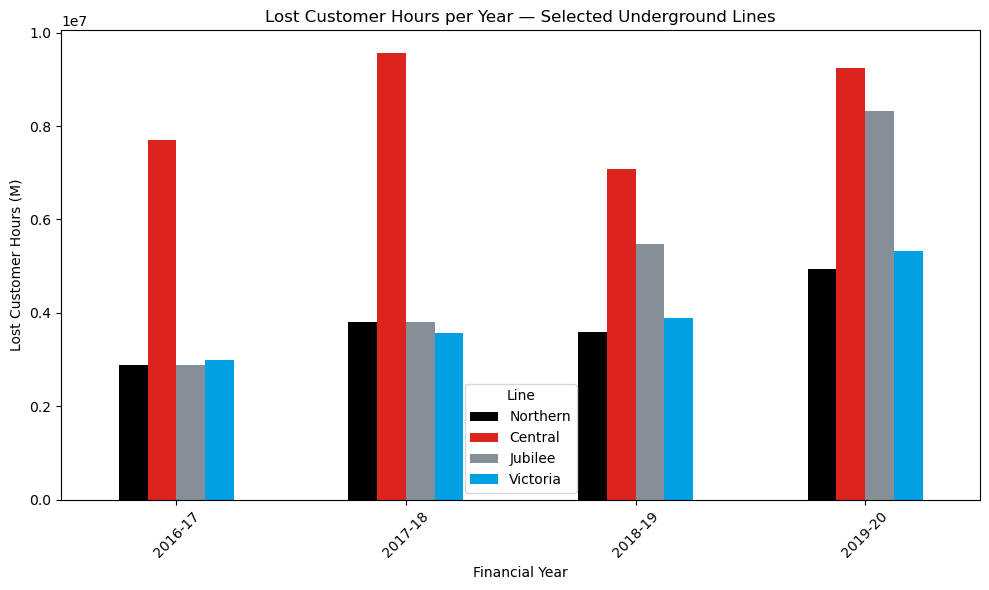

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


df =pd.read_csv("C:/Users/sarth/tfl-northern/raw_data/lost-customer-hours.csv")

cols = ["Financial Year", "Northern", "Central", "Jubilee", "Victoria"]
df_annual = df[cols].copy()

for col in ["Northern", "Central", "Jubilee", "Victoria"]:
    df_annual[col] = (
        df_annual[col]
        .astype(str)
        .str.replace(",", "")
        .replace(r"^\s*$", np.nan, regex=True)
        .apply(pd.to_numeric, errors="coerce")
    )

# grouping by financial year and its sum across periods
df_grouped = df_annual.groupby("Financial Year").sum().reset_index()


tfl_colours = {
    "Northern": "#000000",  # black
    "Central": "#DC241F",   # red
    "Jubilee": "#868F98",   # silver/grey
    "Victoria": "#00A0E2",  # light blue
}

ax = df_grouped.plot(
    x="Financial Year",
    kind="bar",
    figsize=(10,6),
    color=[tfl_colours[col] for col in ["Northern", "Central", "Jubilee", "Victoria"]],
)

ax.set_title("Lost Customer Hours per Year — Selected Underground Lines")
ax.set_ylabel("Lost Customer Hours (Millions)")
ax.set_xlabel("Financial Year")
ax.legend(title="Line")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


#SAVE FIGURE
fig = ax.get_figure()
fig.savefig("C:/Users/sarth/tfl-northern/outputs/figures/barchart2.png", dpi=180, bbox_inches="tight")

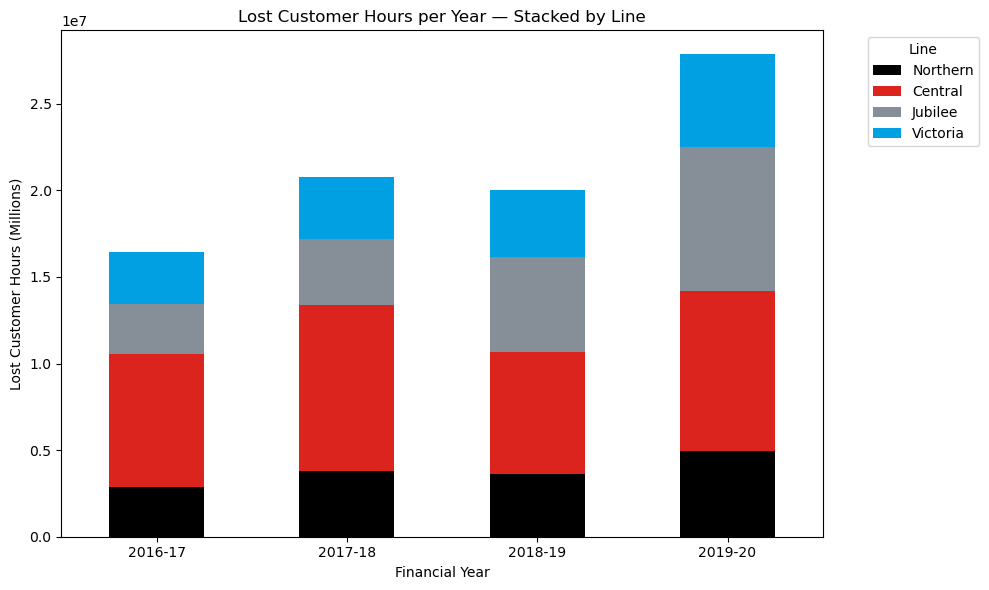

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


df =pd.read_csv("C:/Users/sarth/tfl-northern/raw_data/lost-customer-hours.csv")

cols = ["Financial Year", "Northern", "Central", "Jubilee", "Victoria"]
df_annual = df[cols].copy()

for col in ["Northern", "Central", "Jubilee", "Victoria"]:
    df_annual[col] = (
        df_annual[col]
        .astype(str)
        .str.replace(",", "")
        .replace(r"^\s*$", np.nan, regex=True)
        .apply(pd.to_numeric, errors="coerce")
    )

# grouping by financial year and its sum across periods
df_grouped = df_annual.groupby("Financial Year").sum().reset_index()


tfl_colours = {
    "Northern": "#000000",  # black
    "Central": "#DC241F",   # red
    "Jubilee": "#868F98",   # silver/grey
    "Victoria": "#00A0E2",  # light blue
}

ax = df_grouped.plot(
    x="Financial Year",
    kind="bar",
    stacked=True,
    figsize=(10,6),
    color=[tfl_colours[col] for col in ["Northern", "Central", "Jubilee", "Victoria"]],
)

ax.set_title("Lost Customer Hours per Year — Stacked by Line")
ax.set_ylabel("Lost Customer Hours (Millions)")
ax.set_xlabel("Financial Year")
ax.legend(title="Line", bbox_to_anchor=(1.05,1), loc="upper left")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


#SAVE FIGURE
fig = ax.get_figure()
fig.savefig("C:/Users/sarth/tfl-northern/outputs/figures/barchart3.png", dpi=180, bbox_inches="tight")

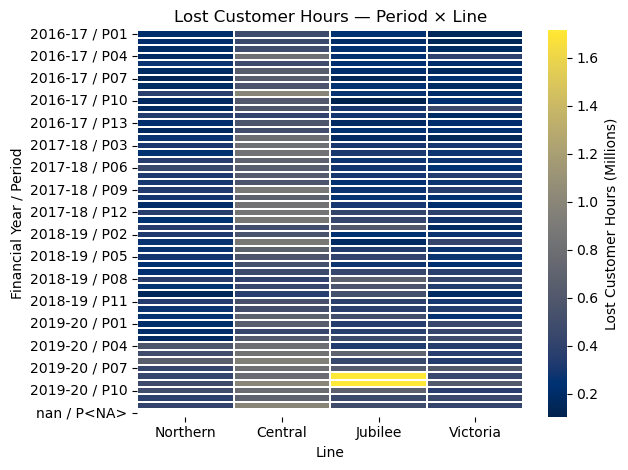

In [1]:
import pandas as pd
import matplotlib
from matplotlib.ticker import StrMethodFormatter
import numpy as np
import seaborn as sns

#obtain src data from directory
df =pd.read_csv("C:/Users/sarth/tfl-northern/raw_data/lost-customer-hours.csv")

#selecting target columns
base_cols = ["Financial Year", "Period"]
line_cols = ["Northern", "Central", "Jubilee", "Victoria"]  # only series you will plot
cols = base_cols + line_cols
df_subset = df[cols].copy()


#cleaning numeric values (removing commas, cast to float)
for col in line_cols:
    df_subset[col] = (
        df_subset[col]
        .astype(str)
        .str.replace(",", "", regex=False)
        .replace(r"^\s*$", np.nan, regex=True)
        .apply(pd.to_numeric, errors="coerce")
    )


#axis build for plotting
df_subset["Period"] = pd.to_numeric(df_subset["Period"], errors="coerce").astype("Int64")
df_subset["fy_period"] = (
    df_subset["Financial Year"].astype(str) + " / P" + df_subset["Period"].astype(str).str.zfill(2)
)
df_sorted = df_subset.sort_values(by=["Financial Year", "Period"]).copy()


#changing from wide to long table structure to assist with the new graph
df_long = df_sorted.melt(
    id_vars= ["Financial Year", "Period", "fy_period"],
    value_vars= line_cols,
    var_name= "Line",
    value_name= "LCH"
)

heat = df_long.pivot(index="fy_period", columns="Line", values="LCH")
heat = heat.reindex(columns=line_cols)
heat_m = heat / 1_000_000

ax = sns.heatmap(
    heat_m,
    cmap="cividis",
    linewidths=0.3,
    linecolor="white",
    cbar_kws={"label": "Lost Customer Hours (Millions)"}
)

ax.set_title("Lost Customer Hours — Period × Line")
ax.set_xlabel("Line")
ax.set_ylabel("Financial Year / Period")
ax.figure.tight_layout()
ax.figure.savefig("C:/Users/sarth/tfl-northern/outputs/figures/heatmap_lines.png", dpi=180, bbox_inches="tight")